# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf

# Load datasets 

In [2]:
train_data = pd.read_csv(r"C:\Users\diyap\OneDrive\Desktop\SpaceShip\train.csv")
test_data = pd.read_csv(r"C:\Users\diyap\OneDrive\Desktop\SpaceShip\test.csv")

# Display basic information

In [3]:
print(train_data.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [4]:
print(test_data.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez  


In [5]:
print(train_data.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [6]:
print(test_data.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000  


In [7]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [8]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


In [9]:
print(train_data.shape)

(8693, 14)


In [10]:
print(test_data.shape)

(4277, 13)


In [11]:
print(train_data.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [12]:
print(test_data.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


# Handle missing values

In [13]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
for col in categorical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    test_data[col] = test_data[col].fillna(test_data[col].median())

C:\Users\diyap\AppData\Local\Temp\ipykernel_1752\749990781.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
C:\Users\diyap\AppData\Local\Temp\ipykernel_1752\749990781.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data[col] = test_data[col].fillna(test_data[col].mode()[0])


# Feature engineering: Split Cabin into Deck, Num, Side

In [14]:
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

# Visualizations

C:\Users\diyap\AppData\Local\Temp\ipykernel_1752\1806735941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='CryoSleep', palette='dark')
C:\Users\diyap\AppData\Local\Temp\ipykernel_1752\1806735941.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='VIP', palette='deep')


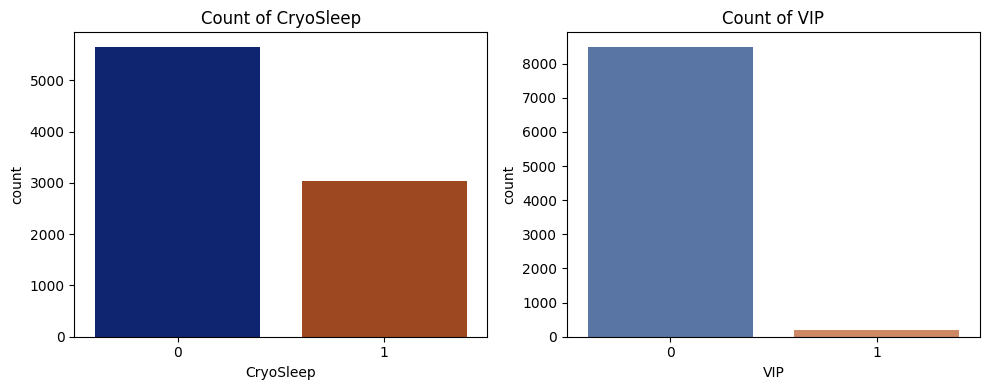

In [32]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='CryoSleep', palette='dark')
plt.title('Count of CryoSleep')
plt.subplot(1, 2, 2)
sns.countplot(data=train_data, x='VIP', palette='deep')
plt.title('Count of VIP')
plt.tight_layout()
plt.show()

# HomePlanet and Destination Distribution

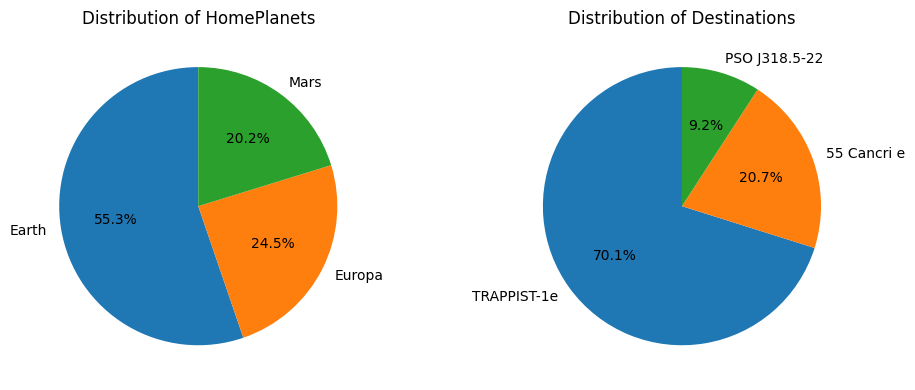

In [16]:
home_planet_counts = train_data['HomePlanet'].value_counts()
destination_counts = train_data['Destination'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].pie(home_planet_counts, autopct='%1.1f%%', startangle=90, labels=home_planet_counts.index)
axes[0].set_title("Distribution of HomePlanets")
axes[1].pie(destination_counts, autopct='%1.1f%%', startangle=90, labels=destination_counts.index)
axes[1].set_title("Distribution of Destinations")
plt.tight_layout()
plt.show()

# Age distribution

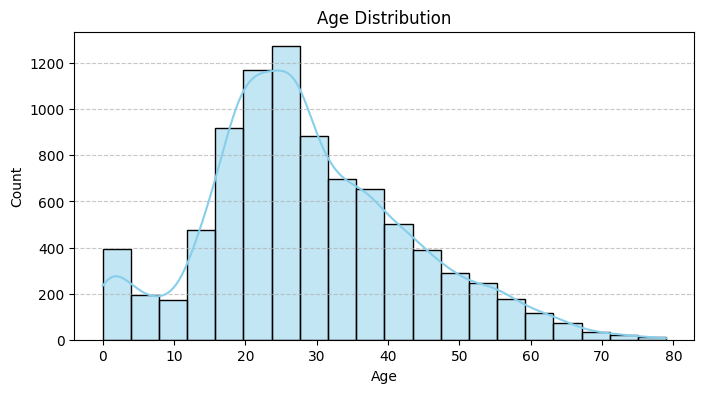

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(train_data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average expenditure by category

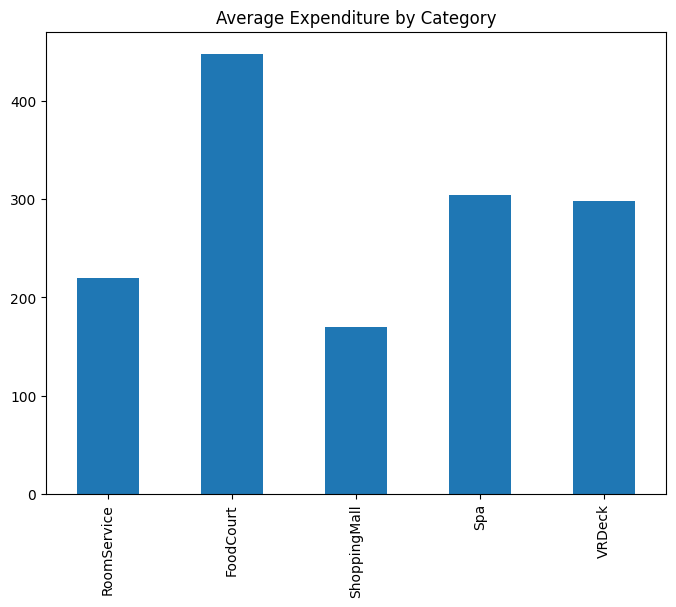

In [18]:
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
avg_expenditure = train_data[expenditure_cols].mean()
plt.figure(figsize=(8, 6))
avg_expenditure.plot.bar()
plt.title('Average Expenditure by Category')
plt.show()

# Label Encoding

In [19]:
label_columns = ['HomePlanet', 'Deck', 'Side', 'CryoSleep', 'Destination', 'VIP']
label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))
    label_encoders[col] = le

# Prepare data for training

In [20]:
x = train_data.drop(columns=['Transported','Cabin','PassengerId','Name'])
y = LabelEncoder().fit_transform(train_data['Transported'])
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_test = test_data.drop(columns=['Cabin', 'Name', 'PassengerId'], axis=1)

# Standardization

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Model Training and Evaluation

## Random Forest 

In [22]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_val)
print(f"RandomForest Accuracy: {accuracy_score(y_val, y_pred_rfc):.2f}")
print(classification_report(y_val, y_pred_rfc))

RandomForest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       861
           1       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



## XGBoost

In [23]:
xgb_model = XGBClassifier(enable_categorical=True)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_val)
print(f"XGBoost Accuracy: {accuracy_score(y_val, y_pred_xgb):.2f}")
print(classification_report(y_val, y_pred_xgb))

XGBoost Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       861
           1       0.80      0.80      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



## LightGBM

In [31]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_val)
print(f"LightGBM Accuracy: {accuracy_score(y_val, y_pred_lgbm):.2f}")
print(classification_report(y_val, y_pred_lgbm))

C:\Users\diyap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
LightGBM Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       861
           1       0.80      0.82      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



C:\Users\diyap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Confusion Matrices

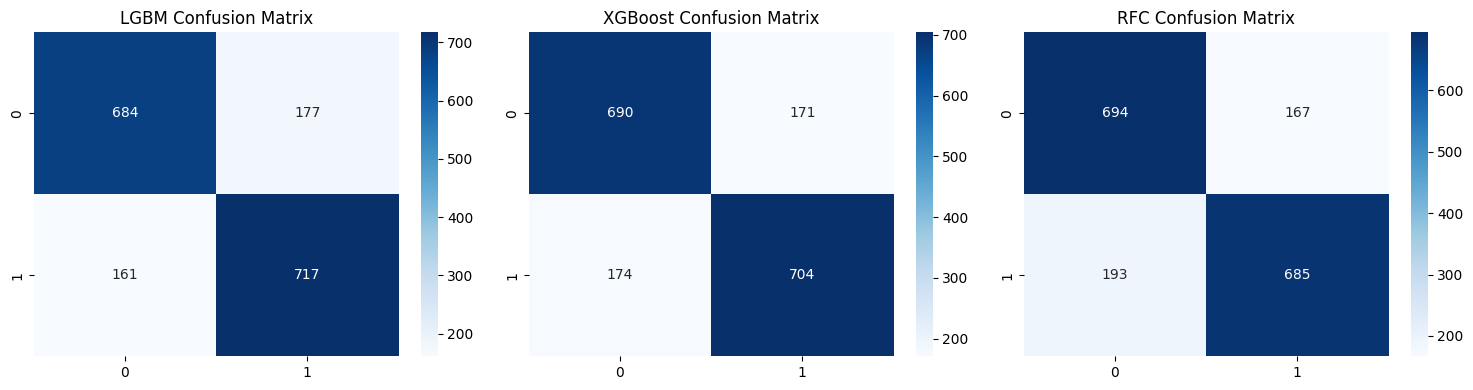

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  
conf_mat_lgbm = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_lgbm)
sns.heatmap(conf_mat_lgbm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('LGBM Confusion Matrix')
conf_mat_xgb = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_xgb)
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix')
conf_mat_rfc = tf.math.confusion_matrix(labels=y_val, predictions=y_pred_rfc)
sns.heatmap(conf_mat_rfc, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('RFC Confusion Matrix')
plt.tight_layout()
plt.show()

# Drop unnecessary columns

In [26]:
new_test_data = test_data.drop(columns=['Name','PassengerId','Cabin'], axis=1)

In [27]:
new_test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5,1


In [28]:
new_test_data['Num'] = pd.to_numeric(new_test_data['Num'], errors='coerce')

In [29]:
import pandas as pd

# 1. Make Predictions
# Ensure Test_data is preprocessed as Train_data (scaling, encoding, etc.)
y_test_pred = lgbm_model.predict(new_test_data)

# Convert predictions to boolean for 'Transported' column
# Assuming 'Transported' is a binary output (True/False)
Transported_pred = (y_test_pred > 0.5)  # Convert probabilities to True/False

# 2. Combine with PassengerId
# Assuming PassengerId is available in Test_data
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  # Replace with the actual column name
    'Transported': Transported_pred
})

# 3. Save as CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv


In [30]:
file_path = r"C:\Users\diyap\OneDrive\Desktop\SpaceShip\submission.csv"

# Save the file
submission.to_csv(file_path, index=False)

print(f"Submission file created: {file_path}")

Submission file created: C:\Users\diyap\OneDrive\Desktop\SpaceShip\submission.csv


# Display first 10 rows of submission file

In [35]:
print(submission[:10])

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01        False
4     0023_01        False
5     0027_01        False
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01         True
